In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('data_1.xlsx')

In [3]:
df

,obs
0,5
1,4
2,4
3,5
4,5
...,...
95,6
96,8
97,6
98,2


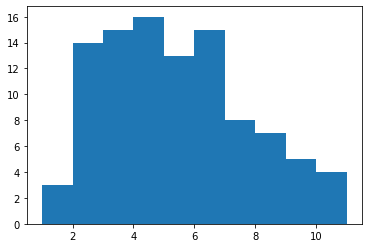

In [4]:
import matplotlib.pyplot as plt
plt.hist(df['obs'])
plt.show()

In [5]:
df.describe()

,obs
count,100.000000
mean,4.940000
std,2.381834
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,11.000000


In [6]:
stats_labels = ['Mean Observed', 'Variance Observed', 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['obs'].mean(), 2), round(df['obs'].var(), 2), round(df['obs'].skew(),2), round(df['obs'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))

{('Mean Observed', 4.94), ('Variance Observed', 5.67), ('Skew Observed', 0.51), ('Kurt Observed', -0.38)}


In [7]:
df.median()

obs    5.0
dtype: float64

In [8]:
import statsmodels.api as sm
import scipy.stats as stats

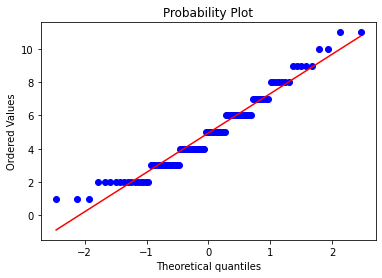

In [9]:
import matplotlib.pyplot as pltp
stats.probplot(df['obs'], plot=plt)
plt.show()

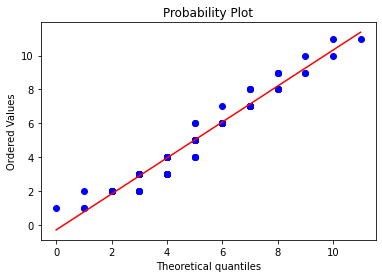

In [10]:
stats.probplot(df['obs'], dist='poisson', sparams=(4.940000,), plot=plt)
plt.show()


In [11]:
print(df)

    obs
0     5
1     4
2     4
3     5
4     5
..  ...
95    6
96    8
97    6
98    2
99    3

[100 rows x 1 columns]


In [12]:
grouped_df = pd.DataFrame()

In [13]:
grouped_df['frequency']= df.groupby('obs')['obs'].count()
grouped_df

,frequency
obs,
1,3
2,14
3,15
4,16
5,13
6,15
7,8
8,7
9,5


In [14]:
len(df)

100

In [15]:
grouped_df['OBS_PROBA'] = grouped_df['frequency']/len(df)
print(grouped_df)

     frequency  OBS_PROBA
obs                      
1            3       0.03
2           14       0.14
3           15       0.15
4           16       0.16
5           13       0.13
6           15       0.15
7            8       0.08
8            7       0.07
9            5       0.05
10           2       0.02
11           2       0.02


In [16]:
from scipy import stats
from scipy.stats import poisson
from scipy.stats import chisquare

In [17]:
poisson.pmf

<bound method rv_discrete.pmf of <scipy.stats._discrete_distns.poisson_gen object at 0x0000026D47534820>>

In [18]:
grouped_df.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64', name='obs')

In [19]:
df['obs'].mean()

4.94

In [20]:
grouped_df['POISSON_PMF'] = poisson.pmf(k=grouped_df.index, mu=df['obs'].mean())

In [21]:
df['obs'].mean()

4.94

In [22]:
grouped_df['POISSON_PMF']

obs
1     0.035344
2     0.087299
3     0.143752
4     0.177534
5     0.175404
6     0.144416
7     0.101916
8     0.062933
9     0.034543
10    0.017064
11    0.007663
Name: POISSON_PMF, dtype: float64

In [23]:
grouped_df

,frequency,OBS_PROBA,POISSON_PMF
obs,,,
1,3,0.03,0.035344
2,14,0.14,0.087299
3,15,0.15,0.143752
4,16,0.16,0.177534
5,13,0.13,0.175404
6,15,0.15,0.144416
7,8,0.08,0.101916
8,7,0.07,0.062933
9,5,0.05,0.034543


In [24]:
grouped_df['POISSON_FREQ'] = grouped_df['POISSON_PMF']*len(df)

In [25]:
grouped_df

,frequency,OBS_PROBA,POISSON_PMF,POISSON_FREQ
obs,,,,
1,3,0.03,0.035344,3.534372
2,14,0.14,0.087299,8.729898
3,15,0.15,0.143752,14.375232
4,16,0.16,0.177534,17.753411
5,13,0.13,0.175404,17.540370
6,15,0.15,0.144416,14.441572
7,8,0.08,0.101916,10.191623
8,7,0.07,0.062933,6.293327
9,5,0.05,0.034543,3.454337


In [26]:
grouped_df['POISSON_FREQ'] = [round(elem,2) for elem in grouped_df['POISSON_FREQ']]

In [27]:
grouped_df

,frequency,OBS_PROBA,POISSON_PMF,POISSON_FREQ
obs,,,,
1,3,0.03,0.035344,3.53
2,14,0.14,0.087299,8.73
3,15,0.15,0.143752,14.38
4,16,0.16,0.177534,17.75
5,13,0.13,0.175404,17.54
6,15,0.15,0.144416,14.44
7,8,0.08,0.101916,10.19
8,7,0.07,0.062933,6.29
9,5,0.05,0.034543,3.45


In [28]:
obs_freq = list(grouped_df['frequency'])
expec_freq = list(grouped_df['POISSON_FREQ'])

NULL HYPOTHESIS: The given data follows Poisson distribution.

---


ALTERNATE HYPOTHESIS: The given data does not follow Poisson distribution

In [29]:
obs_freq

[3, 14, 15, 16, 13, 15, 8, 7, 5, 2, 2]

In [30]:
expec_freq

[3.53, 8.73, 14.38, 17.75, 17.54, 14.44, 10.19, 6.29, 3.45, 1.71, 0.77]

In [31]:
stats.chisquare(obs_freq, expec_freq)

Power_divergenceResult(statistic=7.918170026370538, pvalue=0.636829805444405)

In [32]:
import scipy.stats

In [33]:
scipy.stats.chi2.ppf(1-.05, df=9) # degrees of freedom = k - p - 1.  k = 11, p = 1 (for Poisson)

16.918977604620448

Since computed statistic is higher than tabulated value, we concluded we cannot reject null hypothesis.  Hence, this sample is from a Poisson distribution